9742
9460
144
144
['Toy Story', 'The Usual Suspects', 'From Dusk Till Dawn', 'Bottle Rocket', 'Braveheart', 'Rob Roy', 'Desperado', 'Clerks', 'Ed Wood', 'Pulp Fiction', 'Clear and Present Danger', 'Forrest Gump', 'The Jungle Book', 'The Mask', 'Dazed and Confused', 'The Fugitive', 'Jurassic Park', 'Mrs. Doubtfire', "Schindler's List", 'The Three Musketeers', 'Tombstone', 'Dances with Wolves', 'Batman', 'The Silence of the Lambs', 'Pinocchio', 'Mission: Impossible', 'Space Jam', 'The Rock', 'Twister', "She's the One", 'The Wizard of Oz', 'Mr. Smith Goes to Washington', "Pete's Dragon", 'Alice in Wonderland', 'That Thing You Do!', 'The Ghost and the Darkness', 'Swingers', 'Willy Wonka & the Chocolate Factory', 'Reservoir Dogs', 'Platoon', 'E.T. the Extra-Terrestrial', 'The Abyss', 'Monty Python and the Holy Grail', 'The Princess Bride', 'Apocalypse Now', 'Alien', 'Psycho', 'The Blues Brothers', 'Henry V', 'The Terminator', 'The Shining', 'Groundhog Day', 'Back to the Future', 'Highlander

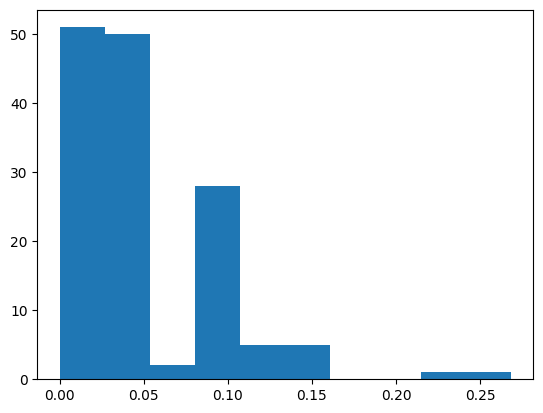

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  8.94it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,15411.506605,127.461472,684.132118,inf,0.459206,4.205504e-28
burr,15501.307745,-111.337151,689.925789,inf,0.356643,8.744530e-17
gamma,17773.648276,85.020360,704.524277,inf,0.356643,8.744530e-17
beta,18190.424757,121.175402,712.801635,inf,0.356643,8.744530e-17
norm,20963.031812,157.894236,723.162663,inf,0.198151,2.139959e-05


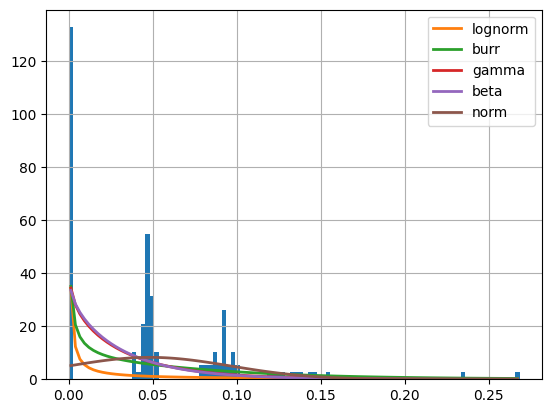

In [3]:
import pandas as pd
from scipy import sparse
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np
from fitter import Fitter, get_common_distributions, get_distributions



#load data
ratings = pd.read_csv('dataset/ratings.csv')
moviesPartial = pd.read_csv('dataset/movies.csv')
moviesFull = pd.read_csv('dataset/movie_dataset.csv')


moviesFull.drop_duplicates(subset = 'title', inplace=True)

#drop certain columns that do nothing
ratings = ratings.drop(['timestamp'], axis = 1)
moviesPartial = moviesPartial.drop(['genres'],axis=1)

#single users rating to be tested
firstUserRatings  = ratings[ratings['userId'] ==1]

#remove the year and keep the name

moviesPartial['title'] = moviesPartial['title'].map(lambda string: string[:-7])
print(len(list(moviesPartial['title'])))
moviesPartial.drop_duplicates(subset = 'title', inplace=True)
print(len(list(moviesPartial['title'])))

#need to remove dupicates otherwise batman

#get title from movie id
def get_title_from_movieId(tmp):
    return moviesPartial[moviesPartial["movieId"]== tmp]["title"].to_string(index=False)

#check if both the partial dataset and the movies full dataset have the same name
def checkTitle(tmp):
    if(tmp not in list(moviesFull["title"])):
        #The word "the" is being apended to the ends of titles
        tmp = tmp[-3:] +" "+ tmp[:-5]
        return moviesFull[moviesFull["title"] == tmp]["title"].to_string(index=False)
    else:
        return moviesFull[moviesFull["title"] == tmp]["title"].to_string(index=False)



firstUserTitles = []
newFirstUserRatings = []
for rating, id in zip(list(firstUserRatings["rating"]), list(firstUserRatings["movieId"])):
    title = get_title_from_movieId(id)
    #print(title)
    checked = checkTitle(title)
    #print(checked)
    if(checked != 'Series([], )'):
        firstUserTitles.append(checked)
        newFirstUserRatings.append(rating)


print(len(firstUserTitles)) 
print(len(newFirstUserRatings))
#print(firstUserTitles)

print(firstUserTitles)

#store the moviesFull data for all the movies that user one rated
fullInfo = pd.DataFrame(columns = list(moviesFull.columns))


i = 0
for name in firstUserTitles:
    if(len(moviesFull[moviesFull["title"] == name]) !=0):
        fullInfo.loc[i] = moviesFull[moviesFull["title"] == name].iloc[0]
    else:
        print("help", i, name)
    i+=1
        #fullData.append(list(moviesFull[moviesFull["title"] == name].iloc[0]))


#why is there a zero val for len(moviesFull[moviesFull["title"] == name])???
#what is the batman glitch???
#after year is removed batman has a copy movie title


print(len(fullInfo))

features = ['keywords','cast','genres','director']


for feature in features:
    fullInfo[feature] = fullInfo[feature].fillna('')


#the columns numbers used to make the extra column
#there are four indices
colNumbers = []
for item in features:   
    colNumbers.append(fullInfo.columns.get_loc(item))


fullData = []
for index, row in fullInfo.iterrows():
    temp = []
    for i in range(len(fullInfo.columns)):
        temp.append(row[i])
    fullData.append(temp)


#print(fullData)

#make the extra column with the coresponding column indices above 
combined_features = []
index =0
for row in fullData:
    fullData[index].append(row[colNumbers[0]]+" "+row[colNumbers[1]]+" "+row[colNumbers[2]]+" "+row[colNumbers[3]])
    combined_features.append(row[colNumbers[0]]+" "+row[colNumbers[1]]+" "+row[colNumbers[2]]+" "+row[colNumbers[3]])
    index+=1

#dont shuffle in order to keep in ordered acording to rating
#random.shuffle(fullData)


#not currently being used, just pick an indice with cosin_sim...
testDataSet = fullData[0:int(len(fullData)/2)]
trainDataSet = fullData[int(len(fullData)/2):len(fullData)]


cv = CountVectorizer() 
count_matrix = cv.fit_transform(combined_features)
cosine_sim = cosine_similarity(count_matrix)

#this is the function that

#contains all the simlairities of the first users first rated movie with the rest of the movies...
#need to extact the actual ratings to predict the rating of the first movie
#then compare the actual to the predicted rating



print(len(list(cosine_sim[0])))
print(len(newFirstUserRatings))
print(list(cosine_sim[0]))
print(newFirstUserRatings)

#find the average for all the ratings excluding the first rating which should be predicted
print(sum(newFirstUserRatings[1:])/(len(newFirstUserRatings)-1))

average = sum(newFirstUserRatings[1:])/(len(newFirstUserRatings)-1)
similairities = list(cosine_sim[0])[1:]
ratings = newFirstUserRatings[1:]




sum1 = 0
for item1, item2 in zip(similairities, ratings):
    sum1 += item1*(item2-average)

print(sum1/(len(newFirstUserRatings)-1)+average)


#this is a simple model at the moment:
#the sum1 value is fair but somewhat arbitrary
#it should take into account the variance of the users rating data and the variance of similarity data

#idea: visualize data

#the simalirity scores of movies to the movie that the user rated has a distribution
#the users ratings to the other movies also has a distribution

#simple model:
#sum all the (similairity*ratings) pairs
#then divide by the number of pairs


#advanced model:

#apply variance to make very high similiarty scores weigh much more
#and the low similairty scores weigh much less
#The abs min is 0 and the abs max is 1
#https://numpy.org/doc/stable/reference/generated/numpy.var.html
#https://numpy.org/doc/stable/reference/generated/numpy.std.html

#compare heights of the distribution if its normal:
#https://guides.fscj.edu/Statistics/standardnormal#:~:text=The%20Normal%20Curve,and%20width%20of%20the%20graph.

#if you divide two hieghts you get how much more likely is one verse the other

#divide each similarity point by the sum of all items of the previous step
#now the entire similairty distribution sums to one 


#note: should also try clustering


count  =len(similairities)

plt.hist(similairities, 10)
plt.show()

f = Fitter(similairities,distributions=['gamma','lognorm',"beta", "burr","norm"])

f.fit()
f.summary()



#fitter
#https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9

# plt.hist(ratings)
# plt.show()





#pick a single point in the test training set to predict its rating using the cos siliarty to it from all the different data points 
#in the train Data set

# cv = CountVectorizer() 

# count_matrix = cv.fit_transform(moviesFull["combined_features"])

# cosine_sim = cosine_similarity(count_matrix)


# #copied code for vectorization
# #used to find simlair movies to avatar
# features = ['keywords','cast','genres','director']

# def combine_features(row):
#     return row['keywords']+" "+row['cast']+" "+row['genres']+" "+row['director']

# for feature in features:
#     moviesFull[feature] = moviesFull[feature].fillna('')

# moviesFull["combined_features"] = moviesFull.apply(combine_features,axis=1)

# cv = CountVectorizer() 

# count_matrix = cv.fit_transform(moviesFull["combined_features"])

# cosine_sim = cosine_similarity(count_matrix)

# def get_title_from_index(index):
#     return moviesFull[moviesFull.index == index]["title"].values[0]
# def get_index_from_title(title):
#     return moviesFull[moviesFull.title == title]["index"].values[0]

# movie_user_likes = "Avatar"
# movie_index = get_index_from_title(movie_user_likes)

# similar_movies = list(enumerate(cosine_sim[movie_index]))

# sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1], reverse=True)[1:6]

#print(sorted_similar_movies)

#end of copied code





#remember that all movies being chosen to add with their rating must
#exist in both movie Half and moviesFull datasets
#they should be matched by name since the ids are different 
#the inputs of both the collaborative anaylis as well as content based analysis
#will be used in the regresion model

#the inputs of both the collaborative analysis as well as conten based analysis
#will be used in the regresion model

#how do we get the training dataset for this?

#for each user:
#take a random selection of half the users movie ratings and use the other half in the...
#content based analysis and collaborative analysis  
#generate the expected ratings for the content based analysis and collaborative using one half to predict
#the ratings for the other half
#furthermore use linear regression with the content based and the collaborative based output as inputs
#use gradient descent to update the linear model

#for a user:
#since the content based analysis is simply comparing movies together for how simlair they are...
#for each movie in the first half(unknown rating)...
#there will be a similarity score for each item of the second half of the movies (known rating)
#each movie in the second half will test its simlairity for an item in the first half...
#and will contribute to that items predicted rating based on its similairty score and rating

#how will it contribute?:
#example:

#three sim scores: 1,1,1
#three corresponding ratings: 2,3,4

#(1*(2-2.5)+1*(3-2.5)+1*(4-2.5))/3 = (-.5+.5+1.5)/3 = .5 + 2.5 = 3

#three sim scores: .8,.75,.9
#three corresponding ratings: 2,3,4

#(.8*(2-2.5)+.75*(3-2.5) +.9*(4-2.5))/3 = (-.4+.375+1.35)/3 + 2.5 = .44167 + 2.5 = 2.94167

#note: cosine similairity is betwen (-1,1) if not simly map from (0,1) it before calling

#note: average user ratin may be important to incorporate
